## 1차 과제 - 고객 유지/이탈 자유 분석
- 주제: 가입 고객 이탈 데이터를 분석하여 기업에 인사이트 제공
- 데이터: Customer Churn Data(train data가 따로 있으나 너무 커서 test data만 사용, 예측 성능 향상을 원한다면 train data 사용해도 무방)
https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset?select=customer_churn_dataset-training-master.csv
- 사용 라이브러리: 자유

본 과제는 여러분들의 실력을 확인하고자 출제한 과제로 어떠한 가이드라인도 제공하거나 제약하지 않으며 자유롭게 분석하시면 됩니다.

분석이나 예측 어느 쪽이든 상관없으며 몇가지 조건만 유의하여 주시기 바랍니다.

### 조건
1. 기본적인 분석 과정은 EDA(데이터 탐색) > 전처리 > 분석(예측) 진행 > 결과 해석 으로 진행되지만 약간의 수정 허용
2. EDA 과정에서 최소 2개의 시각화 모형(그래프) 사용
3. 분석 및 예측 시 최소 2개의 모형(모델) 사용
4. 전처리는 자유롭게 진행하며 추가적인 데이터 사용이 필요하다면 허용

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv('customer_churn_dataset-testing-master.csv')
data.head(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
5,6,30,Male,41,14,10,10,Premium,Monthly,500,29,0
6,7,47,Female,37,15,9,28,Basic,Quarterly,574,14,1
7,8,54,Female,36,11,0,18,Standard,Monthly,323,16,0
8,9,36,Male,20,5,10,8,Basic,Monthly,687,8,0
9,10,65,Male,8,4,2,23,Basic,Annual,995,10,0


## EDA

In [2]:
data.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [4]:
data.tail(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
64364,64365,48,Female,36,22,4,22,Premium,Annual,342,9,1
64365,64366,26,Female,54,24,2,21,Basic,Annual,165,23,1
64366,64367,64,Male,30,27,9,28,Premium,Annual,884,21,1
64367,64368,51,Male,47,17,10,26,Basic,Annual,544,24,1
64368,64369,45,Male,3,1,5,11,Standard,Annual,218,15,1
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1
64373,64374,52,Female,45,15,9,25,Standard,Monthly,696,22,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [7]:
data.shape

(64374, 12)

In [9]:
data.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [49]:
data.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


## 전처리

In [10]:
X = data.drop(columns='Churn') # 독립변수
y = data['Churn'] # 종속변수

In [12]:
X

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20
2,3,47,Male,27,10,2,29,Premium,Annual,757,21
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18
4,5,53,Female,58,24,9,2,Standard,Annual,533,18
...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13


In [33]:
from sklearn.preprocessing import StandardScaler
# 수치형 변수 스케일링
# 수치형 컬럼 추출
X_num = X.drop(columns=['Gender', 'Subscription Type', 'Contract Length'])

# StandardScaler 선언 및 Fitting
sdscaler = StandardScaler()
scaled_data = sdscaler.fit_transform(X_num)


# 표준화가 완료된 데이터를 데이터프레임 형태로 변환
scaled_data = pd.DataFrame(scaled_data, 
                              index=X_num.index, 
                              columns=X_num.columns)
scaled_data

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction
0,-1.732024,-1.434202,-0.409100,-0.122526,-0.449807,1.114538,0.218408,-0.752324
1,-1.731970,-0.069730,-0.233642,1.465424,0.513590,-0.467000,0.164742,0.521065
2,-1.731916,0.361155,-0.292128,-0.576225,-1.092072,1.340472,0.827900,0.636827
3,-1.731862,-0.500616,-1.344876,-0.349375,-0.128674,-0.015132,-1.184575,0.289540
4,-1.731809,0.792041,1.520939,1.011724,1.155855,-1.709637,-0.030756,0.289540
...,...,...,...,...,...,...,...,...
64369,1.731809,0.217527,0.058789,-0.349375,0.192458,0.436736,1.556225,-0.173511
64370,1.731862,-0.356988,-1.520334,-1.597050,-0.128674,0.549703,1.464226,-0.752324
64371,1.731916,-1.218759,0.409705,-0.122526,0.834723,1.453439,-0.820413,0.521065
64372,1.731970,0.576598,-0.818502,0.444599,0.513590,0.549703,-0.003923,-0.289273


In [37]:
# One-hot Encoding
X_dum = pd.get_dummies(X, columns = ['Gender', 'Subscription Type', 'Contract Length'])
X_cate = X_dum[['Gender_Female', 'Gender_Male', 'Subscription Type_Basic', 'Subscription Type_Premium', 
       'Subscription Type_Standard', 'Contract Length_Annual', 'Contract Length_Monthly', 'Contract Length_Quarterly']]

In [50]:
X_dt = pd.concat([scaled_data, X_cate], axis=1)
X_dt.head(10)

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,-1.732024,-1.434202,-0.409100,-0.122526,-0.449807,1.114538,0.218408,-0.752324,1,0,1,0,0,0,1,0
1,-1.731970,-0.069730,-0.233642,1.465424,0.513590,-0.467000,0.164742,0.521065,1,0,0,0,1,0,1,0
2,-1.731916,0.361155,-0.292128,-0.576225,-1.092072,1.340472,0.827900,0.636827,0,1,0,1,0,1,0,0
3,-1.731862,-0.500616,-1.344876,-0.349375,-0.128674,-0.015132,-1.184575,0.289540,0,1,0,1,0,0,0,1
4,-1.731809,0.792041,1.520939,1.011724,1.155855,-1.709637,-0.030756,0.289540,1,0,0,0,1,1,0,0
5,-1.731755,-0.859688,0.526677,-0.122526,1.476987,-0.805901,-0.157254,1.562928,0,1,0,1,0,0,1,0
6,-1.731701,0.361155,0.292733,-0.009101,1.155855,1.227505,0.126409,-0.173511,1,0,1,0,0,0,0,1
7,-1.731647,0.863856,0.234247,-0.462800,-1.734336,0.097835,-0.835746,0.058014,1,0,0,0,1,0,1,0
8,-1.731593,-0.428802,-0.701530,-1.143350,1.476987,-1.031835,0.559570,-0.868086,0,1,1,0,0,0,1,0
9,-1.731540,1.653813,-1.403362,-1.256775,-1.092072,0.662670,1.740222,-0.636561,0,1,1,0,0,1,0,0


In [48]:
X_dt.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
count,6.437400e+04,6.437400e+04,6.437400e+04,6.437400e+04,6.437400e+04,6.437400e+04,6.437400e+04,6.437400e+04,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,-8.476976e-17,-1.801357e-16,-9.183390e-17,5.651317e-17,-1.483471e-16,-1.554112e-16,-4.944902e-17,2.560753e-17,0.533647,0.466353,0.333225,0.332759,0.334017,0.332588,0.343772,0.323640
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,0.498870,0.498870,0.471370,0.471205,0.471649,0.471144,0.474970,0.467868
min,-1.732024e+00,-1.721459e+00,-1.812764e+00,-1.597050e+00,-1.734336e+00,-1.935571e+00,-1.690569e+00,-1.678425e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.660120e-01,-8.596877e-01,-8.185018e-01,-9.165002e-01,-7.709392e-01,-8.059011e-01,-8.740788e-01,-8.680864e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000e+00,2.083902e-03,5.878857e-02,-9.100567e-03,1.924579e-01,2.108019e-01,-2.692262e-02,-5.774822e-02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.660120e-01,8.638555e-01,8.775929e-01,8.982991e-01,8.347227e-01,8.886039e-01,8.700663e-01,8.683525e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.732024e+00,1.653813e+00,1.637911e+00,1.692274e+00,1.476987e+00,1.453439e+00,1.759389e+00,1.678691e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


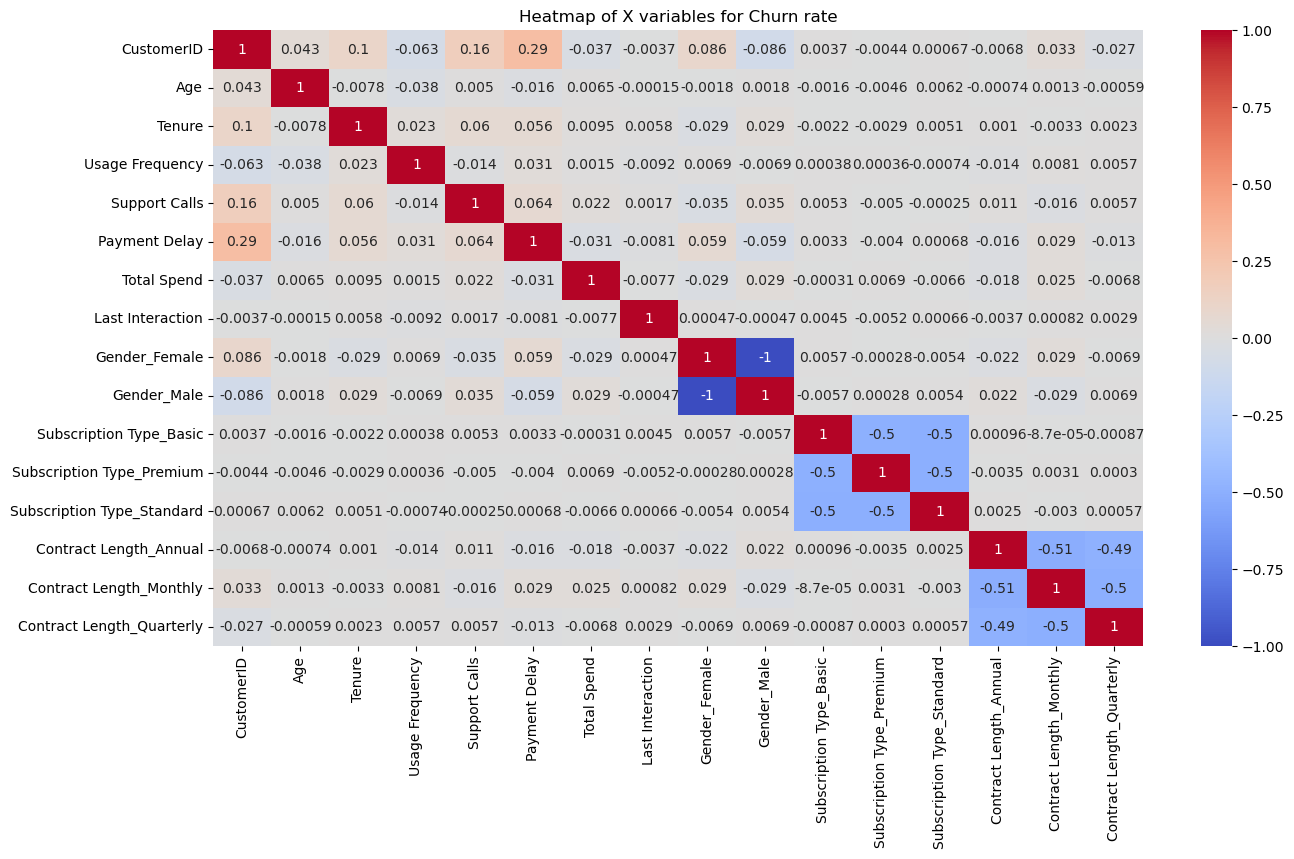

In [41]:
# 독립변수 상관관계 히트맵

plt.figure(figsize=(15, 8))  
sns.heatmap(X_dt.corr(), annot=True, cmap='coolwarm')  
plt.title('Heatmap of X variables for Churn rate')  
plt.show()

In [24]:
ratio = pd.DataFrame(y.value_counts()/y.count())
ratio.reset_index(inplace = True)
ratio

,index,Churn
0,0,0.526315
1,1,0.473685


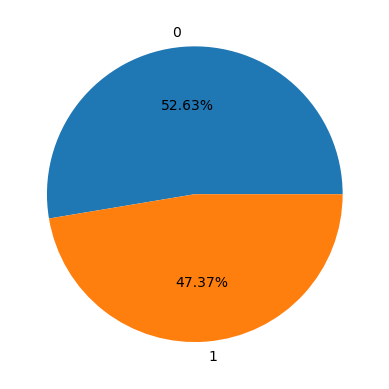

In [25]:
# 고객이탈비율 시각화
plt.pie(x = list(ratio['Churn']), 
           labels = list(ratio['index']),
           autopct = '%.2f%%')
plt.show() # 1이 이탈한 고객 비율

## 로지스틱 회귀 모델 학습

In [43]:
from sklearn.model_selection import train_test_split

# 데이터셋 분할

X_train, X_test, y_train, y_test = train_test_split(X_dt, y, test_size = 0.25, random_state=123, stratify=y)

print('Xtrain_shape', X_train.shape)
print('Xtest_shape', X_test.shape)
print('ytrain_shape', y_train.shape)
print('ytest_shape', y_test.shape)

Xtrain_shape (48280, 16)
Xtest_shape (16094, 16)
ytrain_shape (48280,)
ytest_shape (16094,)


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

# 모델 학습
lgr = LogisticRegression()
lgr.fit(X_train, y_train)

# 예측
y_pred = lgr.predict(X_test)
y_prob = lgr.predict_proba(X_test)[:,1] # 고객 이탈할 확률

In [45]:
# 성능평가 함수
def result(y_test, y_pred, y_prob):
    result = {}
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    # 결과 출력
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'ROC AUC: {auc:.4f}')

In [46]:
result(y_test, y_pred, y_prob)

Accuracy: 0.8661
Precision: 0.8587
Recall: 0.8586
F1 Score: 0.8586
ROC AUC: 0.9401


## 랜덤 포레스트 모델 학습

In [52]:
from sklearn.ensemble import RandomForestClassifier

# 모델 학습
rfc = RandomForestClassifier(n_estimators=200, random_state=123)  # n_estimators= 결정 트리의 개수
rfc.fit(X_train, y_train)

# 예측
y_pred = rfc.predict(X_test)
y_prob = rfc.predict_proba(X_test)[:,1] # 고객 이탈할 확률

# 성능 평가
result(y_test, y_pred, y_prob)

Accuracy: 0.9989
Precision: 0.9997
Recall: 0.9979
F1 Score: 0.9988
ROC AUC: 1.0000


#### 랜덤 포레스트 모델의 성능이 더 좋은 것을 확인

### ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

### 고객이탈에 영향을 끼치는 독립변수 확인

In [59]:
# 로지스틱 회귀계수 출력
coefficients = pd.Series(lgr.coef_[0], index=X_train.columns)
print(coefficients.sort_values(ascending=False))

Payment Delay                 1.860213
CustomerID                    1.286647
Support Calls                 0.999986
Tenure                        0.599658
Gender_Female                 0.468006
Age                           0.247173
Contract Length_Monthly       0.224518
Subscription Type_Basic       0.025985
Last Interaction             -0.002043
Subscription Type_Standard   -0.065230
Contract Length_Annual       -0.106437
Subscription Type_Premium    -0.112181
Contract Length_Quarterly    -0.269507
Total Spend                  -0.270179
Usage Frequency              -0.542718
Gender_Male                  -0.619431
dtype: float64


In [57]:
# 랜덤 포레스트 변수 중요도 출력
importances = pd.Series(rfc.feature_importances_, index=X_train.columns)
print(importances.sort_values(ascending=False))

Payment Delay                 0.328107
CustomerID                    0.278501
Support Calls                 0.122526
Tenure                        0.090145
Usage Frequency               0.047887
Total Spend                   0.032335
Gender_Male                   0.023701
Age                           0.023529
Gender_Female                 0.022779
Contract Length_Monthly       0.012791
Contract Length_Annual        0.005503
Last Interaction              0.004963
Contract Length_Quarterly     0.004494
Subscription Type_Basic       0.001180
Subscription Type_Premium     0.000807
Subscription Type_Standard    0.000751
dtype: float64


### Payment Delay, Support Calls 가 제일 고객 이탈에 영향을 많이 미치는 것을 확인.
#### (CustomerID는 단순 인덱스이므로 뺌)